# <center>Goodreads statistics 2021</center>
#### <center>Stanislav Maryenko</center><center>January 2022</center>

 - **Description:** Looking back to 2021, I have read pretty descent amount of books. Many of them were taken from recommendation lists and have pretty high average rating. So I would like to know if people's rating correlates with my taste.
 - **Goal:** Dive into books rating statistics and check if there is correlation between my and people ratings
 - **Known limitations:**
	* Dataset is limited to 115 books rad in 2021
	* My rating is a whole number between 2 and 5, but Average rating is rational

## Data

Data is extracted from my [Goodreads account](https://www.goodreads.com/user/year_in_books/2021/132390660) from 2021

In [139]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [140]:
#Path to the data containing file
data_path = "/Users/smaryenko/Downloads/goodreads_library_export.csv"

In [141]:
#Loading data into dataframe
df_init = pd.read_csv(data_path, on_bad_lines='skip')

## Data manipulation

**Actions done:**

 - Filter in only necessary columns
 - Filter in only books from Read shelf
 - Additional column with rating difference added

In [142]:
#Filter in only necessary columns
df = df_init[['Book Id', 'Title','Author', 'My Rating', 'Average Rating', 'Read Count']]

In [143]:
#Filter in only books which were read
df = df.loc[df['Read Count'] != 0]

In [144]:
#Adding a column which contains difference between My Rating and Average Rating
df['Rate Diff'] = df['My Rating'] - df['Average Rating']

## Looking into statistics

In [145]:
#Looking into statistics on rating columns
df[['My Rating', 'Average Rating', 'Rate Diff']].describe()

,My Rating,Average Rating,Rate Diff
count,115.000000,115.000000,115.000000
mean,3.773913,4.003565,-0.229652
std,0.937156,0.257873,0.903682
min,2.000000,3.440000,-2.200000
25%,3.000000,3.845000,-0.910000
50%,4.000000,4.020000,-0.100000
75%,4.500000,4.165000,0.505000
max,5.000000,4.670000,1.560000


<AxesSubplot:>

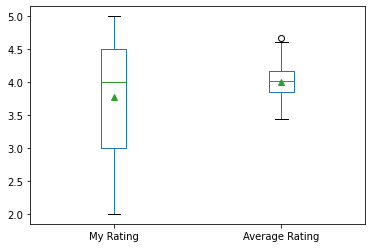

In [146]:
#Box plotting rating columns
df.boxplot(column=['My Rating', 'Average Rating'], showmeans=True, grid=False)

<AxesSubplot:>

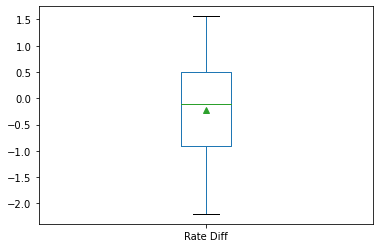

In [147]:
df.boxplot(column=['Rate Diff'], showmeans=True, grid=False)

**Key observations:**
 - People's rating is more densely packed and have small deviation
 - Median value of botth rating are similar and around 4.0, however my mean rating is lower
 - Negative mean and median on Rating difference mean that I am stricter in my taste

## Finding correlation

<AxesSubplot:xlabel='Average Rating', ylabel='My Rating'>

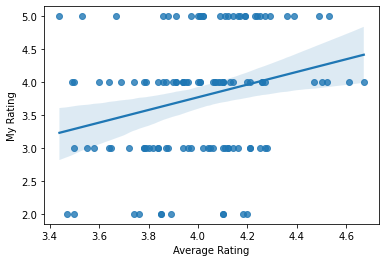

In [148]:
#Plotting correclation between My Rating and Average Rating
sns.regplot(y='My Rating', x='Average Rating', data=df)

In [149]:
#Finding correclation between My Rating and Average Rating
df['Average Rating'].corr(df['My Rating'])

0.2650698873157077

**Key observations:**
 - Correlation is positive even though it is not very high

## Outlines

 - Book which has closet average rating to mine
 - Book which I like the most, but people hated
 - Book which I did not like, however it has a good score

In [150]:
#Finding book which has closest Average Rating compared to My Rating
min_diff = min(df['Rate Diff'], key=abs)
df.loc[df['Rate Diff'] == min_diff]

,Book Id,Title,Author,My Rating,Average Rating,Read Count,Rate Diff
91,57183157,Пожалейте читателя. Как писать хорошо,Kurt Vonnegut Jr.,4,4.0,1,0.0


[Kurt Vonnegut Jr. - Pity the Reader: On Writing with Style](https://www.goodreads.com/book/show/45282043-pity-the-reader)

In [151]:
#Finding book which has maximimun difference between My Rating and Average Rating
df.loc[df['Rate Diff'] == df['Rate Diff'].max()]

,Book Id,Title,Author,My Rating,Average Rating,Read Count,Rate Diff
16,34326366,Страна коров,Adrian Jones Pearson,5,3.44,1,1.56


[Adrian Jones Pearson - Cow Country](https://www.goodreads.com/book/show/25363654-cow-country)

In [152]:
#Finding book which has minimum difference between My Rating and Average Rating
df.loc[df['Rate Diff'] == df['Rate Diff'].min()]

,Book Id,Title,Author,My Rating,Average Rating,Read Count,Rate Diff
26,21522217,Роман без вранья,Anatoly Mariengof,2,4.2,1,-2.2


[Anatoly Mariengof - A Novel Without Lies](https://www.goodreads.com/book/show/2419225.A_Novel_Without_Lies)

## Conclusion

Despite the fact that my personal judgement is more scrupulous and there are some outliers and disagreements between my taste and people's rating, in general, there is a positive correlation, which means that most probably I will like book which has high rating on Goodreads